# System Engineering Assignment 2
Name: WANG Renjia (王仁嘉)


Students ID: 2023040901026


Platform: Jupyter Notebook (Python)


## Assignment Questions


Generate 5000 and 50,000 samples respectively, and calculate the mean, variance, and probability density function of the variable $y$. $x_1$ and $x_2$ follows a normal distribution and a uniform distribution, respectively, and $x_3$ follows a distribution with the following probability density function:
$$
y=(x_1^2+1)(x_2x_3+1)
$$
$$
x_1 \sim N(0, 1^2), \quad x_2 \sim U[1, 2]
$$
$$
pdf(x_3) = 134.5333(x_3-0.3)^2(x_3-0.7)^2, \quad x_3\in [0,1]
$$

- Question-1: Check whether the variable $x_3$ is a random variable? Plot the probability density graph of $x_3$.
- Question-2: Calculate the mean and variance of the variable $y$, and plot the histogram of $y$.

---


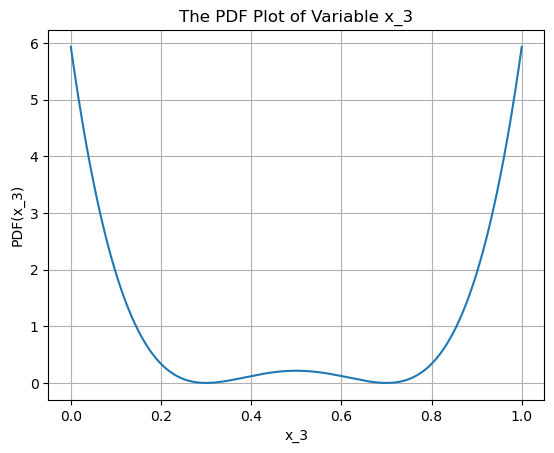

The Integral Estimate Value of X_3's PDF: 1.0001295248536746
The Standard Error of the Estimation 0.00666948841668407


In [1]:
# Question-1
import numpy as np
import matplotlib.pyplot as plt

def pdf(x_3):
    result = 134.5333 * ((x_3 - 0.3) ** 2) * ((x_3 - 0.7) ** 2)
    return result

n_points = 50_000

x_3 = np.linspace(0,1,n_points)
pdf_x_3 = pdf(x_3)

plt.plot(x_3, pdf_x_3)
plt.title('The PDF Plot of Variable x_3')
plt.xlabel('x_3')
plt.ylabel('PDF(x_3)')
plt.grid(True)
plt.show()

int_est = (1 - 0) * np.mean(pdf_x_3)
print('The Integral Estimate Value of X_3\'s PDF:', int_est)

std_err = (1 - 0) * np.std(pdf_x_3, ddof=1) / np.sqrt(n_points)
print('The Standard Error of the Estimation', std_err)

---

Apparently, the integral estimation 1.000031849911244 is close to 1, so $x_3$ satisfies normalization, so $x_3$ is a random variable, and the graph of PDF is showed above.

Next, use the rejection-acceptance mothod to generate samples of $x_3$. The rejection-acceptance method is a sampling technique used to generate random numbers from a target PDF $f(x)$ when direct sampling is difficult. The basic idea is to use a simpler proposal distribution $g(x)$ that is easy to sample from.

1. Find a proposal distribution $g(x)$ and constant M such that:
$$
f(x)\le M\cdot g(x), \quad \text{for all } x
$$
Here I use uniform distribution as $g(x)$ and $M=\max\left(f(x)\right)$
2. Algorithm
   - Generate candidate $x$ from $g(x)$
   - Generate $u$ from $\text{Uniform }(0,1)$
   - Accept $x$ if $u\le \frac{f(x)}{M\cdot g(x)}$
   - Otherwise, reject and repeat

---


Generated 50000 samples with an acceptance rate of 0.1690


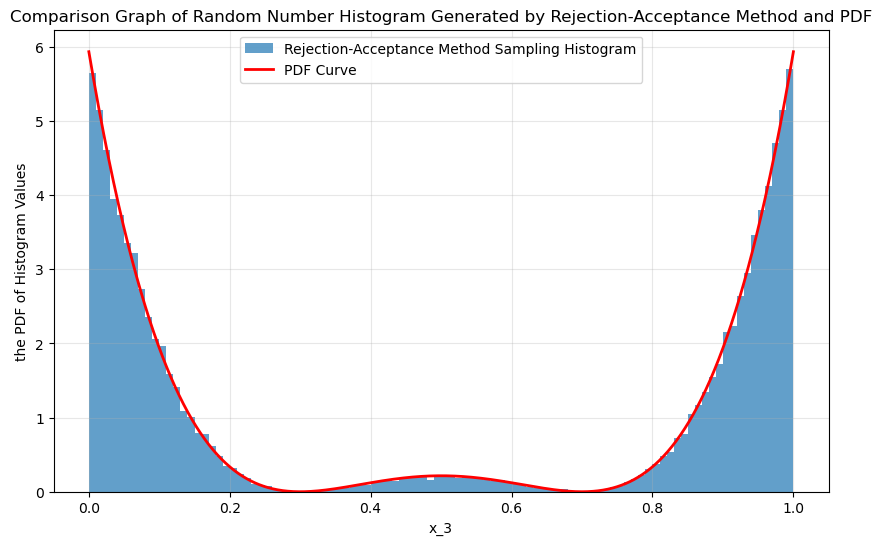

In [2]:
# Generate random value of x_3

def generate_x3_samples(n_samples=10000, display=False):

    x_range = np.linspace(0, 1, 1000)
    pdf_values = pdf(x_range)

    max_pdf = np.max(pdf_values)
    
    a, b = 0, 1
    
    samples = []
    attempts = 0
    
    while len(samples) < n_samples:
        attempts += 1
        
        x_candidate = np.random.uniform(a, b)
        
        u = np.random.uniform(0, max_pdf)
        
        if u <= pdf(x_candidate):
            samples.append(x_candidate)
    
    acceptance_rate = n_samples / attempts

    if display:
        print(f"Generated {n_samples} samples with an acceptance rate of {acceptance_rate:.4f}")
    
    return np.array(samples)

samples = generate_x3_samples(n_points, True)

plt.figure(figsize=(10, 6))

x_plot = np.linspace(0, 1, 1000)
pdf_plot = pdf(x_plot)

plt.hist(samples, bins=100, density=True, alpha=0.7, label='Rejection-Acceptance Method Sampling Histogram')
plt.plot(x_plot, pdf_plot, 'r-', linewidth=2, label='PDF Curve')
plt.title('Comparison Graph of Random Number Histogram Generated by Rejection-Acceptance Method and PDF')
plt.xlabel('x_3')
plt.ylabel('the PDF of Histogram Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---

Obseriesly, the effectiveness of generating random numbers using the rejection-acceptance method is acceptable. Next, I proceed to generate samples of $y$

---

Number of Samples: 50000
Mean: 3.4971784489329485
Variance: 8.619517173268656 


Number of Samples: 5000
Mean: 3.443360730280832
Variance: 8.290462007876672


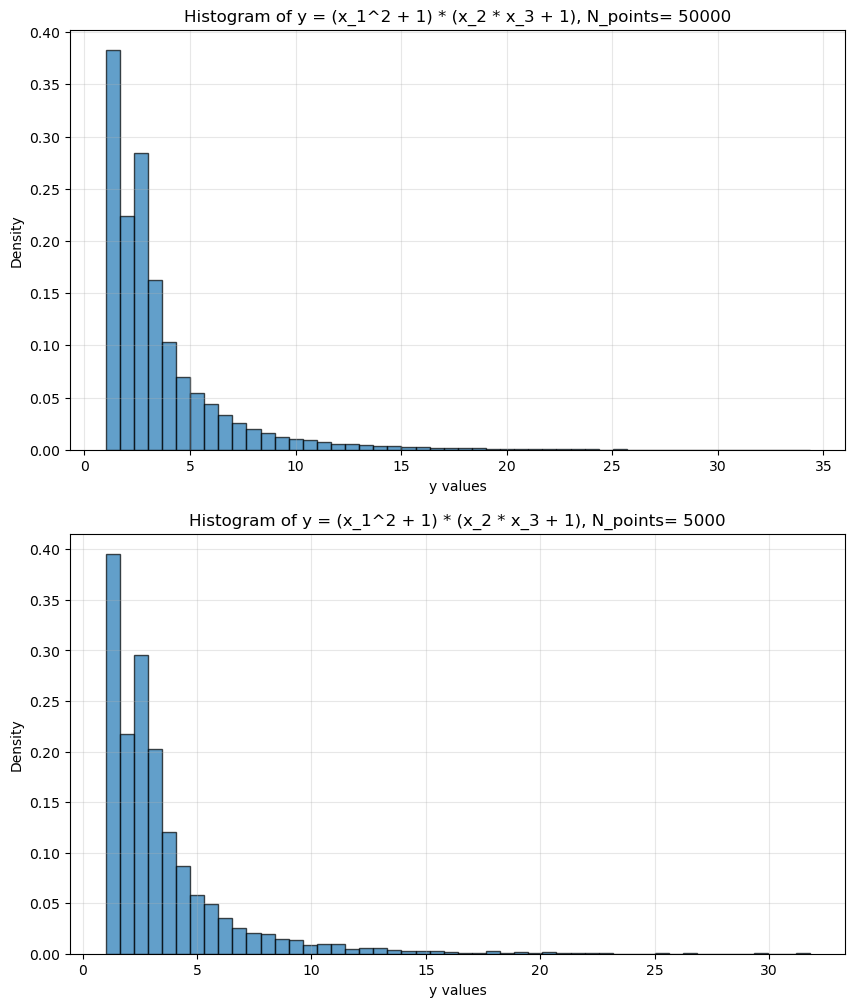

In [3]:
# Question-2
n_points = 50_000
x_1 = np.random.randn(n_points)
x_2 = np.random.uniform(1,2,n_points)
x_3 = generate_x3_samples(n_points)
y = (x_1 ** 2 + 1) * (x_2 * x_3 + 1)

print('Number of Samples:', n_points)
mean = np.mean(y)
variance = np.var(y)
print('Mean:',mean)
print('Variance:',variance,'\n\n')

plt.figure(figsize=(10, 12))
plt.subplot(2,1,1)
plt.hist(y, bins=50, alpha=0.7, edgecolor='black', density=True)
plt.xlabel('y values')
plt.ylabel('Density')
plt.title(f'Histogram of y = (x_1^2 + 1) * (x_2 * x_3 + 1), N_points= {n_points}')
plt.grid(True, alpha=0.3)

n_points = 5000

x_1 = np.random.randn(n_points)
x_2 = np.random.uniform(1,2,n_points)
x_3 = generate_x3_samples(n_points)
y = (x_1 ** 2 + 1) * (x_2 * x_3 + 1)

print('Number of Samples:', n_points)
mean = np.mean(y)
variance = np.var(y)
print('Mean:',mean)
print('Variance:',variance)


plt.subplot(2,1,2)
plt.hist(y, bins=50, alpha=0.7, edgecolor='black', density=True)
plt.xlabel('y values')
plt.ylabel('Density')
plt.title(f'Histogram of y = (x_1^2 + 1) * (x_2 * x_3 + 1), N_points= {n_points}')
plt.grid(True, alpha=0.3)
plt.show()

---

The mean, variance and histogram of random variable $y$ are showed above with sample numbers 5000 and 50_000 respectively.